In [2]:
import pandas as pd

df_fragments = pd.read_csv('../fake0.csv', header=None) 
df_ori = pd.read_csv('../full_bafu.txt', header=None)  


In [3]:
import pandas as pd

df_ori = pd.read_csv('../full_bafu.txt', header=None)  
df_ori

,0
0,3.145
1,3.145
2,3.129
3,3.115
4,3.117
...,...
426013,3.389
426014,3.394
426015,3.408
426016,3.426


In [4]:
df_ori.head()
df_fragments.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3.145,3.075,3.101,3.263,3.364,3.674,3.229,3.144,3.154,3.520,...,2.980,3.172,3.077,2.992,3.947,4.717,3.870,3.510,3.310,3.260
1,3.145,3.095,3.096,3.235,3.373,3.695,3.225,3.140,3.150,3.529,...,2.987,3.180,3.070,3.002,3.950,4.665,3.867,3.510,3.310,3.260
2,3.129,3.076,3.086,3.221,3.371,3.725,3.226,3.134,3.130,3.518,...,2.990,3.180,3.070,3.000,3.932,4.655,3.850,3.502,3.330,3.250
3,3.115,3.088,3.105,3.216,3.330,3.744,3.200,3.134,3.125,3.464,...,3.000,3.190,3.067,3.007,3.900,4.657,3.797,3.497,3.347,3.252
4,3.117,3.067,3.108,3.218,3.315,3.741,3.221,3.138,3.128,3.447,...,3.000,3.192,3.062,3.012,3.877,4.645,3.790,3.490,3.350,3.260


In [5]:
len(df_ori)

426018

<Axes: >

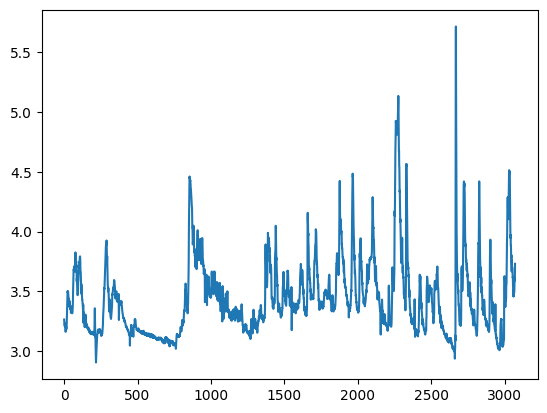

In [6]:
df_fragments[3].plot()


426018


<Axes: >

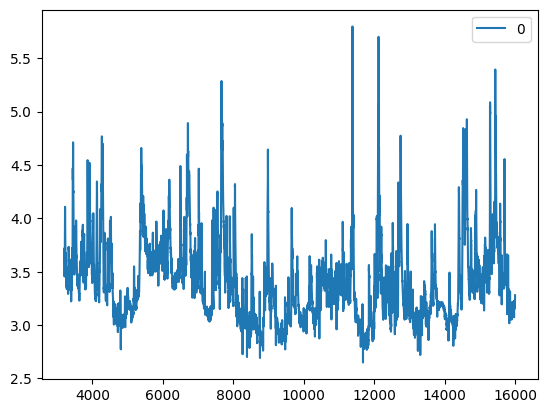

In [7]:
df_gen_full = pd.read_csv('../full_bafu.txt', header=None)  
print(len(df_gen_full))
df_gen_full[3200*1:3200*5].plot()


In [7]:
df_graph_full = pd.read_csv('/home/temp/ABench-IoT/Generation/stream/result_stream/full_bafu/graph_with_update/graph-generation.txt', header=None)  
print(len(df_graph_full))
#df_graph_full.plot()

df_naive_full = pd.read_csv('/home/temp/ABench-IoT/Generation/stream/result_stream/full_bafu/naive/fake_long0.csv', header=None)  
print(len(df_naive_full))
#df_graph_full.plot()


3072000
307100


In [8]:
df_ori[0][:307095].mean()-df_gen_full[0][:307095].mean()

0.0013141308064295032

In [9]:
print(df_ori[0][:307095].mean())
print(df_gen_full[0][:307095].mean())
print(df_graph_full[0][:307095].mean())
print(df_naive_full[0][:307095].mean())

met_ori = df_ori[0][:307095]
met_lsh = df_gen_full[0][:307095]
met_graph = df_graph_full[0][:307095]
met_naive = df_naive_full[0][:307095]

dic = {}
dic['mean'] = [abs(float(met_ori.mean()-met_lsh.mean())),
               abs(float(met_ori.mean()-met_graph.mean())),
               abs(float(met_ori.mean()-met_naive.mean())),
              ]
dic['std'] = [abs(float(met_ori.std()-met_lsh.std())),
               abs(float(met_ori.std()-met_graph.std())),
               abs(float(met_ori.std()-met_naive.std())),
              ]
dic['median'] = [abs(float(met_ori.median()-met_lsh.median())),
               abs(float(met_ori.median()-met_graph.median())),
               abs(float(met_ori.median()-met_naive.median())),
              ]
dic['max'] = [abs(float(met_ori.max()-met_lsh.max())),
               abs(float(met_ori.max()-met_graph.max())),
               abs(float(met_ori.max()-met_naive.max())),
              ]
dic['min'] = [abs(float(met_ori.min()-met_lsh.min())),
               abs(float(met_ori.min()-met_graph.min())),
               abs(float(met_ori.min()-met_naive.min())),
              ]
from sklearn.metrics import mutual_info_score
import numpy
def calc_MI(x, y, bins):
    c_xy = numpy.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi
dic['mi'] = [calc_MI(met_ori, met_lsh, 5000),
               calc_MI(met_ori, met_graph,5000),
               calc_MI(met_ori, met_naive, 5000)
              ]

dic['pcorr'] = [numpy.corrcoef(met_ori, met_lsh)[0, 1],
               numpy.corrcoef(met_ori, met_graph)[0, 1],
               numpy.corrcoef(met_ori, met_naive)[0, 1]
              ]
from scipy.stats import kurtosis, skew
dic['skewness'] = [abs(float(kurtosis(met_ori))-float(kurtosis(met_lsh))),
               abs(float(kurtosis(met_ori))-float(kurtosis(met_graph))),
               abs(float(kurtosis(met_ori))-float(kurtosis(met_naive)))
              ]
dic['kurtosis'] = [abs(float(skew(met_ori))-float(skew(met_lsh))),
               abs(float(skew(met_ori))-float(skew(met_graph))),
               abs(float(skew(met_ori))-float(skew(met_naive)))
              ]

def anomaly_score(df):
    from sklearn.ensemble import IsolationForest
    final = []
    for i in range(1):
        isolation_forest = IsolationForest(n_estimators=100)
        isolation_forest.fit(df.values.reshape(-1, 1))
        xx = numpy.linspace(df.min(), df.max(), len(df)).reshape(-1, 1)
        # anomaly_score = isolation_forest.decision_function(xx)
        outlier = isolation_forest.predict(xx)

        # getting anomaly score for each value
        anos = []
        for index, v in df.items():
            idx = int((v - df.min()) / ((df.max() - df.min()) / len(xx))) - 1
            anos.append(outlier[idx] == -1)
        anos = numpy.array(anos)
        final.append(len(anos[anos == True]) / len(anos))
    # return len(anos[anos == True]) / len(anos)
    return sum(final) / len(final)

dic['anomaly'] = [abs(anomaly_score(met_ori[:10000])-anomaly_score(met_lsh[:10000])),
               abs(anomaly_score(met_ori[:10000])-anomaly_score(met_graph[:10000])),
                  abs(anomaly_score(met_ori[:10000])-anomaly_score(met_naive[:10000]))
              ]

df = pd.DataFrame(dic, index=['lsh','graph','naive'])
df['mi'] = 1/df['mi']
df['pcorr'] = 1/df['pcorr']

df.rename({'pcorr': 'pcorr^-1', 'mi': 'mi^-1'}, axis=1, inplace= True)
df
# print(df_gen_full[:307095])
# print(df_graph_full[:307095])
# print(df_naive_full[:307095])

3.3478496849509116
3.346535554144482
3.4901832071508814
3.3455588661489117


,mean,std,median,max,min,mi^-1,pcorr^-1,skewness,kurtosis,anomaly
lsh,0.001314,0.016178,0.021,0.059,0.036,0.497601,11.918566,2.268207,0.503181,0.0300
graph,0.142334,0.116460,0.200,0.985,0.256,0.583062,-57.615091,4.476911,0.965067,0.0040
naive,0.002291,0.028558,0.027,0.000,0.036,0.509635,130.595755,0.284725,0.133736,0.0581


In [10]:
# import numpy as np
# import matplotlib.pyplot as plt


# fig = plt.figure(dpi = 200)
# ax1 = fig.add_subplot(2,2,1)
# n, bins, patches = ax1.hist(met_ori, 500)
# ax1.yaxis.set_visible(False)
# ax1.set_title('original')

# ax2 = fig.add_subplot(2,2,2)
# n, bins, patches = ax2.hist(met_lsh, 500)
# ax2.yaxis.set_visible(False)
# ax2.set_title('lsh')

# ax3 = fig.add_subplot(2,2,3)
# n, bins, patches = ax3.hist(met_graph, 500)
# ax3.yaxis.set_visible(False)
# ax3.set_title('graph')

# ax4 = fig.add_subplot(2,2,4)
# n, bins, patches = ax4.hist(met_naive, 500)
# ax4.yaxis.set_visible(False)
# ax4.set_title('naive', fontsize=110)




In [11]:
# import random
# import numpy
# from matplotlib import pyplot

# # bins = numpy.linspace(min(met_ori), max(met_ori), 500)

# # pyplot.hist(met_ori, bins, alpha=0.5, label='met_ori')
# # pyplot.hist(met_lsh, bins, alpha=0.5, label='met_lsh')
# # pyplot.hist(met_graph, bins, alpha=0.5, label='graph')
# # pyplot.hist(met_naive, bins, alpha=0.5, label='naive')
# # pyplot.legend(loc='upper right')
# # pyplot.show()

# hist_ori, _ = np.histogram(met_ori, bins=100)
# hist_lsh, _ = np.histogram(hist_lsh, bins=100)
# hist_graph, _ = np.histogram(met_graph, bins=100)
# hist_naive, _ = np.histogram(hist_naive, bins=100)

# def return_intersection(hist_1, hist_2):
#     minima = np.minimum(hist_1, hist_2)
#     intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
#     return intersection

# dic['hist'] = [return_intersection(hist_ori, hist_lsh),
#                    return_intersection(hist_ori, hist_graph),
#                   return_intersection(hist_ori, hist_naive)
#               ]

# print(pd.DataFrame(dic, index=))




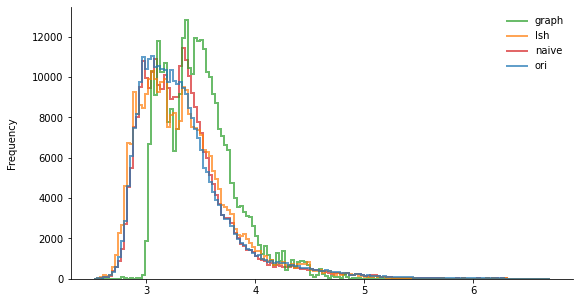

In [12]:
import numpy as np                   # v 1.19.2
import matplotlib.pyplot as plt      # v 3.3.2
from matplotlib.lines import Line2D


# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist([met_ori, met_lsh, met_graph, met_naive], bins=150, histtype='step', linewidth=2,
        alpha=0.7, label=['ori','lsh', 'graph', 'naive'])

# Edit legend to get lines as legend keys instead of the default polygons
# and sort the legend entries in alphanumeric order
handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Frequency', labelpad=15)
plt.savefig('/home/temp/gen_distribution.png', dpi=600)


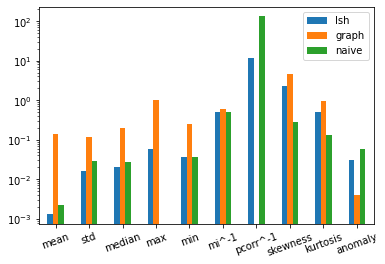

In [13]:
ax = df.T.plot.bar(rot=0, logy=True)
ax.set_xticklabels(df.T.index,rotation=20)
fig = ax.get_figure()
fig.savefig('/home/temp/gen_metrics.png', dpi=600)

# ax.legend(bbox_to_anchor=(1.1, 1.0))
# yTicks = [10, 30, 50, 70]
# yTickLabels = [ f'{i:,}' for i in yTicks ]


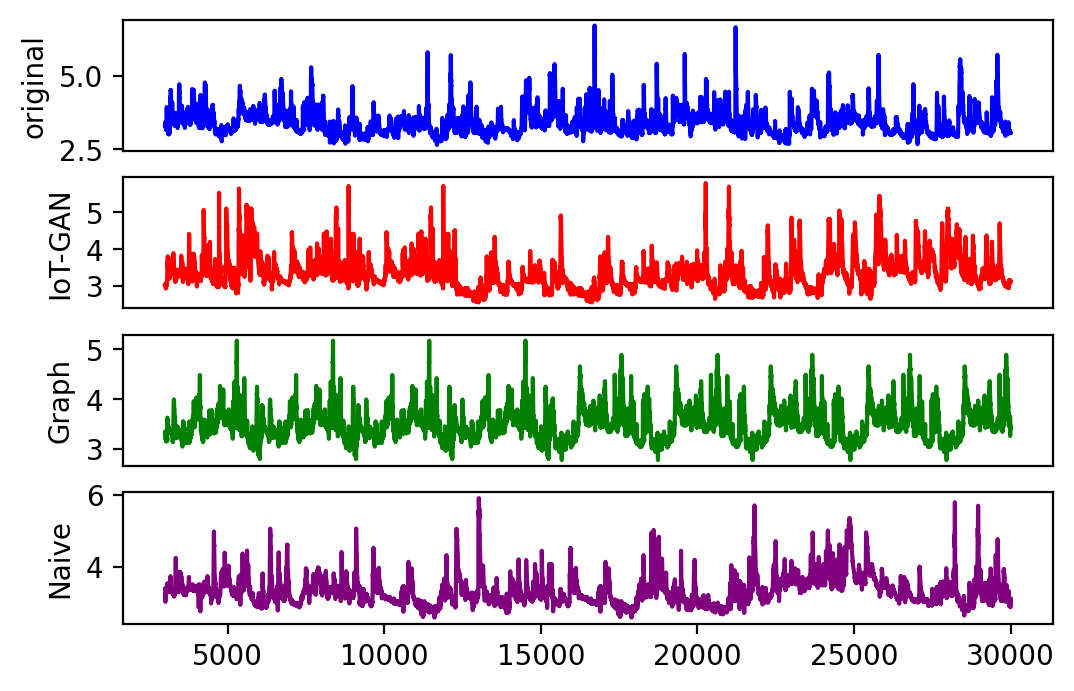

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(dpi = 200)
ax1 = fig.add_subplot(4,1,1)
ax1.plot(df_ori[1000*3:1000*30], 'b-')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('original')

ax2 = fig.add_subplot(4,1,2)
ax2.plot(df_gen_full[1000*3:1000*30], 'r')
ax2.xaxis.set_visible(False)
ax2.set_ylabel('IoT-GAN')


ax3 = fig.add_subplot(4,1,3)
ax3.plot(df_graph_full[1000*3:1000*30], 'g')
ax3.set_ylabel('Graph')
ax3.xaxis.set_visible(False)

ax4 = fig.add_subplot(4,1,4)
ax4.plot(df_naive_full[1000*3:1000*30], 'purple')
ax4.set_ylabel('Naive')

fig.savefig('/home/temp/full_figure.png')


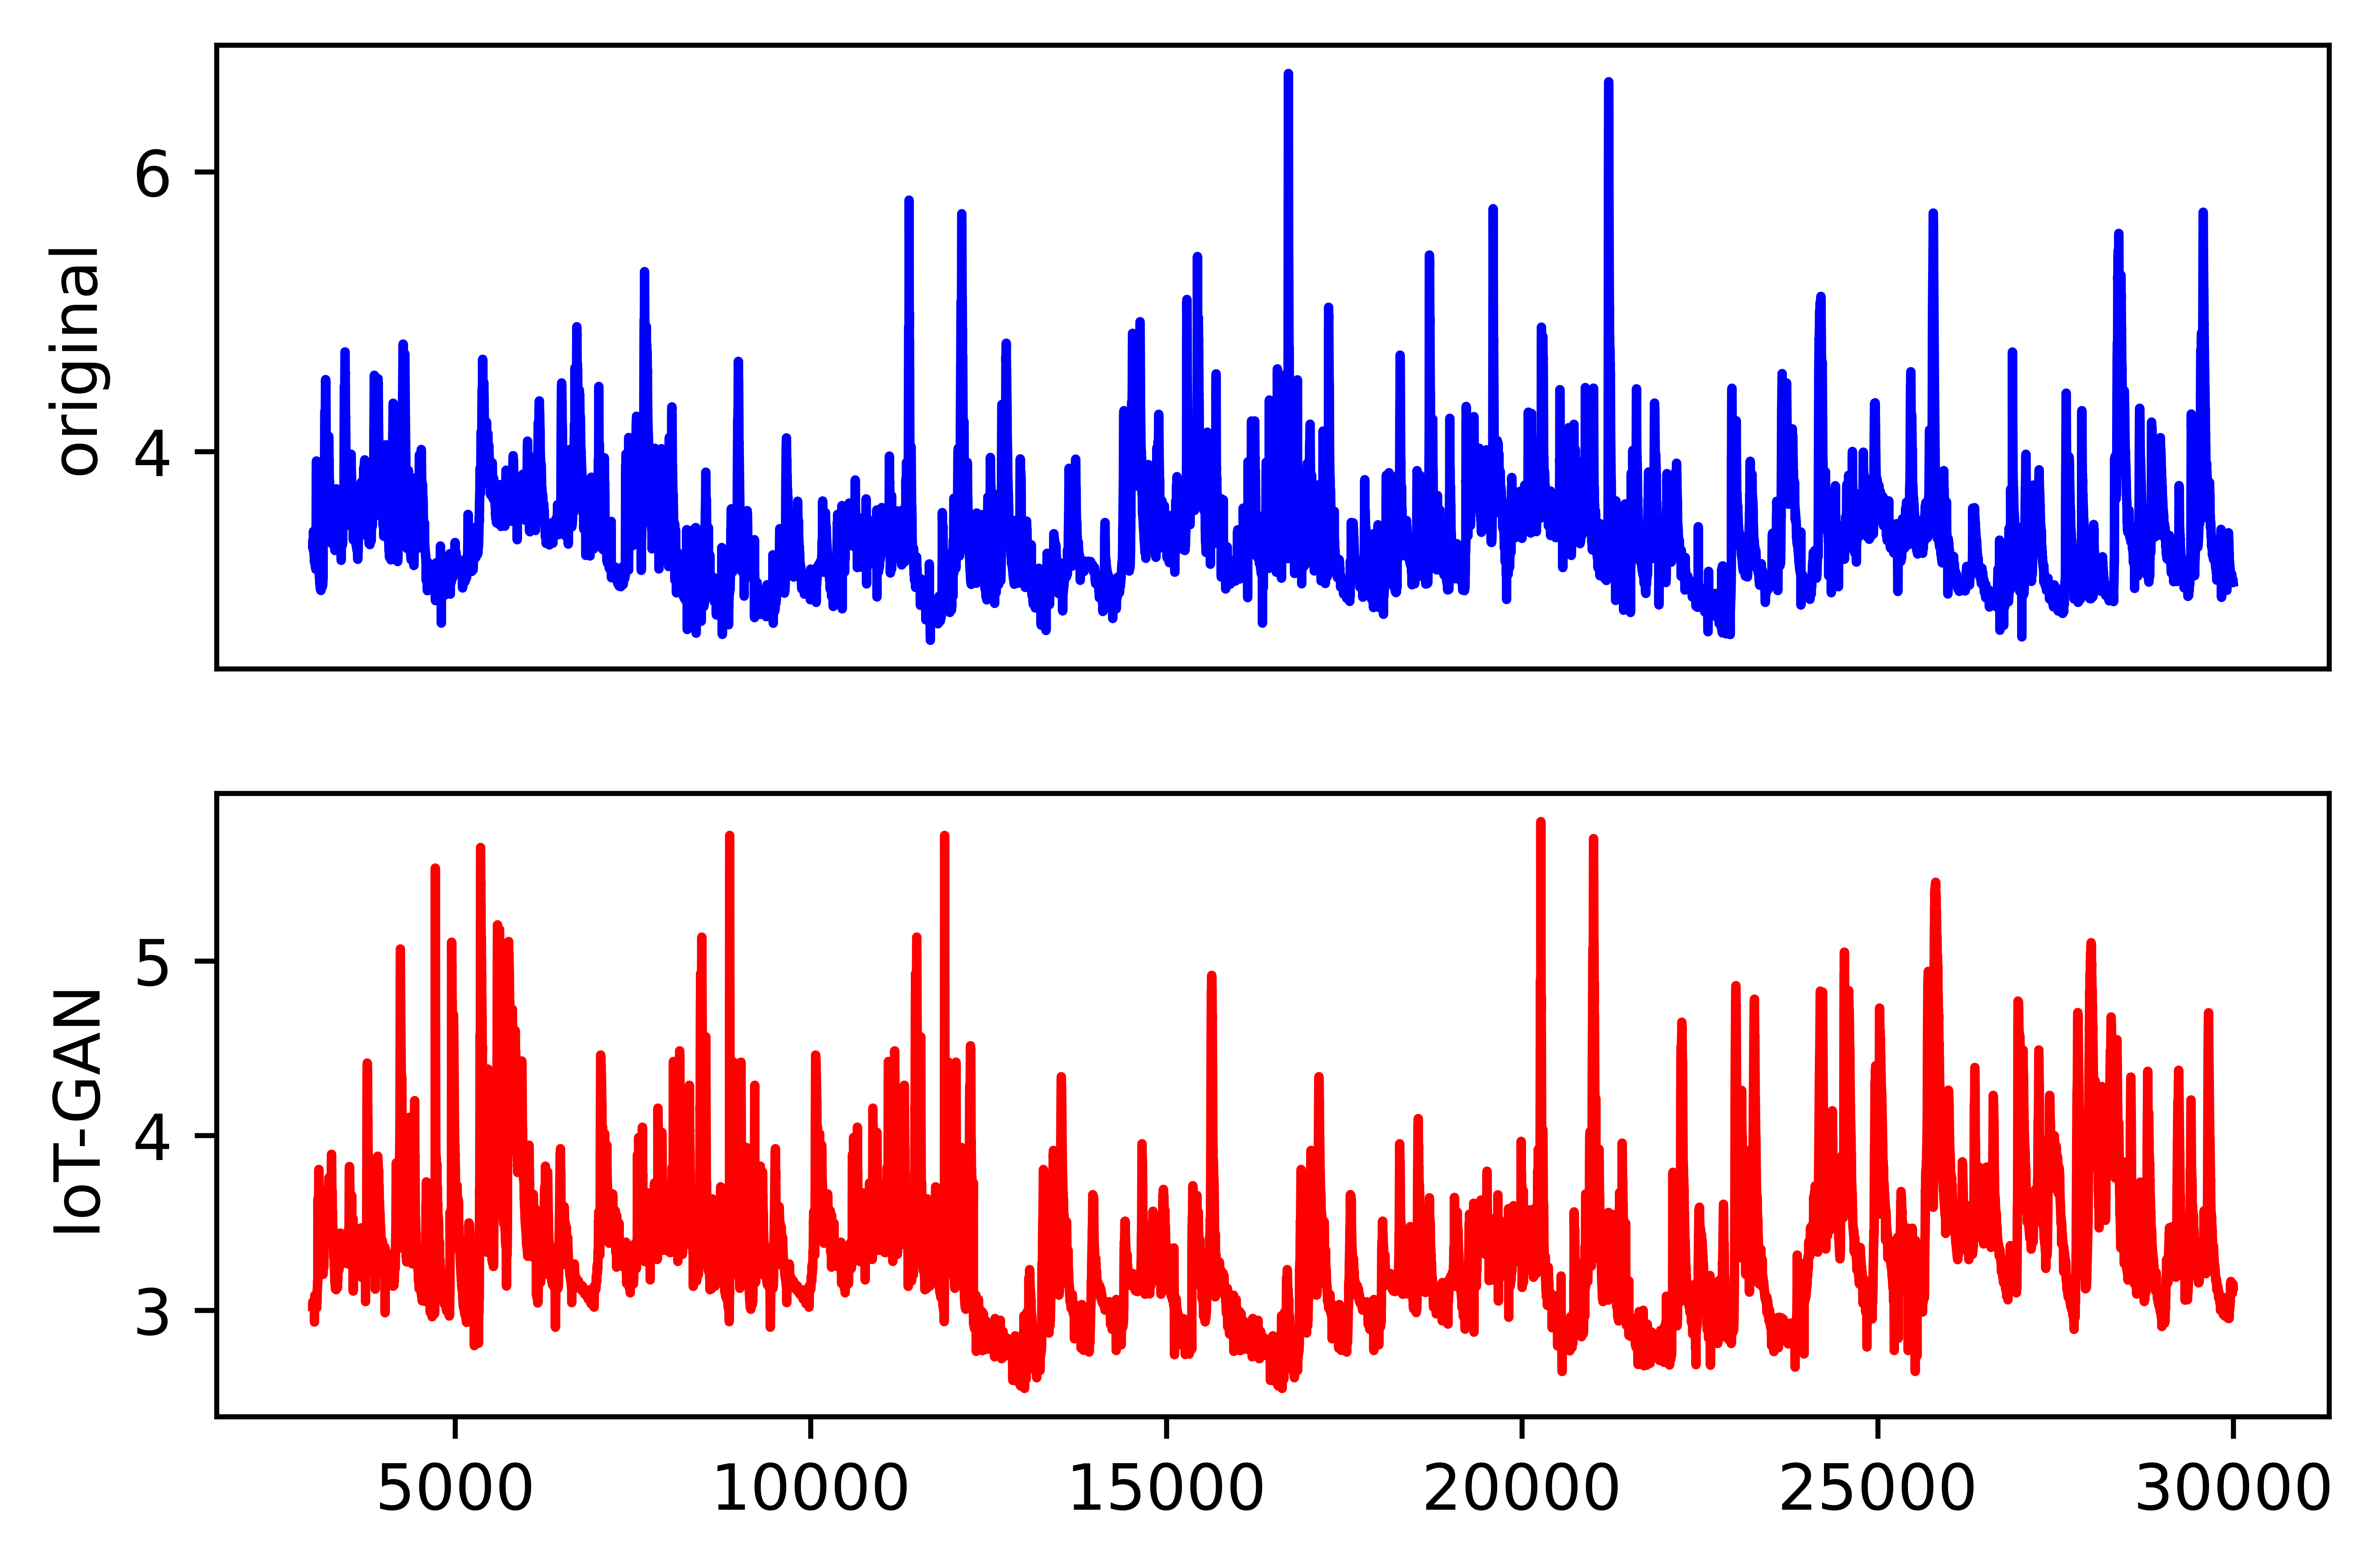

In [15]:
fig = plt.figure(dpi = 1200)
ax1 = fig.add_subplot(2,1,1)
ax1.plot(df_ori[1000*3:1000*30], 'b-')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('original')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(df_gen_full[1000*3:1000*30], 'r')
ax2.set_ylabel('IoT-GAN')

fig.savefig('/home/temp/gen_full_figure.png')


In [16]:
df = df_gen_full[0:100*1000]

In [17]:
import numpy 
y = numpy.asarray(list(df[0]))
y

array([3.076, 3.092, 3.008, ..., 3.362, 3.358, 3.348])

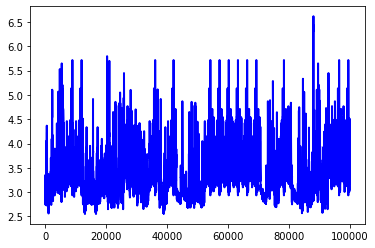

In [18]:
plt.plot(y, linewidth=2, linestyle="-", c="b")  # smooth by filter

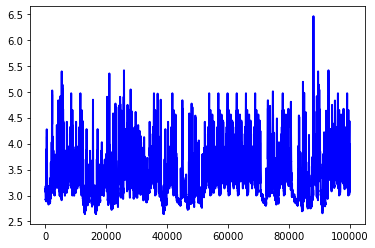

In [19]:
from scipy.signal import lfilter

n = 10  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,y)
plt.plot(yy[10:], linewidth=2, linestyle="-", c="b")  # smooth by filter


In [20]:
# importing module
import sys
sys.path.append('/home/temp/ABench-IoT/Generation/')
import stream.hashing.lsh_main as lsh

lsh = lsh.LSH_conca()
time = lsh.lsh_main_input_complexity('/home/temp/ABench-IoT/Generation/datasets/full_bafu.txt', '/home/temp/ABench-IoT/Generation/gan/dcgan', '/home/temp/ABench-IoT/Generation/gan/dcgan', 3072, 10,
    3072, 10, 426018, False, 100, 1.5, None, gen_ts_length=1, gen_ts_dim=1)

print('LSH time : %s', time)


AttributeError: 'LSH_conca' object has no attribute 'lsh_main_input_complexity'

In [ ]:
import pandas as pd

df = pd.read_csv('/home/temp/ABench-IoT/Datasets/bafu_10k.txt', header=0, sep = ' ') 


In [ ]:
y = numpy.asarray(list(df['discharge']))
y

In [ ]:
plt.plot(y, linewidth=2, linestyle="-", c="b")  # smooth by filter

In [ ]:
from scipy.signal import lfilter

mu, sigma = 0, 0.1


n = 5  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
x = numpy.arange(0, len(y), 1)  # x axis
z = numpy.random.normal(mu, sigma, len(x))  # noise
# import random
# for i in range(len(z)):
#     if random.uniform(0, 1) < 0.2:
#         pass
#     else: 
#         z[i] = 0
yy = lfilter(b,a,y)
plt.plot(yy + z, linewidth=2, linestyle="-", c="b")

In [ ]:
fig = plt.figure(dpi = 1200)
ax1 = fig.add_subplot(2,1,1)
ax1.plot(y, 'b-')
ax1.xaxis.set_visible(False)
ax1.set_ylabel('original')

ax2 = fig.add_subplot(2,1,2)
ax2.plot((yy + z)[10:], 'r')
ax2.set_ylabel('original')
fig.savefig('/home/temp/full_figure.png')
